# working with image in pytorch 

In [1]:
import numpy
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# download training datasets
dataset= MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the MNIST class by passing train=False to the constructor.

In [4]:
test_dataset= MNIST(root='data/', train=False)
len(test_dataset)

10000

lets  take sample element from datasets

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class PIL.Image.Image, which is a part of the Python imaging library Pillow. We can view the image within Jupyter using matplotlib, the de-facto plotting and graphing library for data science in Python

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at a couple of images from the dataset

Label: 1


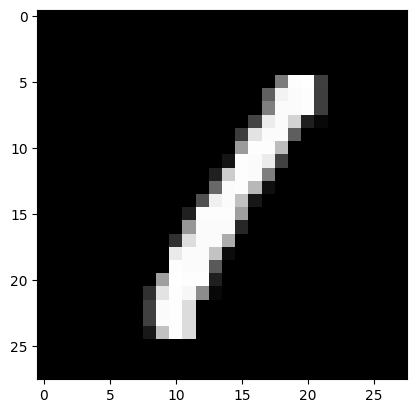

In [7]:
image, label = dataset[3]
plt.imshow(image, cmap='gray')
print('Label:', label)

pytorch does'nt know how to work with images so we can use the torchvision to convert the image into tensors we can do it by transform We'll use the ToTensor transform to convert images into PyTorch tensors.


In [8]:
import torchvision.transforms as transforms

In [9]:
# mnist datasets (image and label)
dataset=MNIST(root='data/',
              train=True,
              transform=transforms.ToTensor())

Now, The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey.

In [10]:
img_tensor, label=dataset[0]
print(img_tensor[0, 10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


# While building real-world machine learning models, it is quite common to split the dataset into three parts:
training set , validation set , test set So from MNIST we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the 'random_spilt' method from PyTorch.

In [11]:
from torch.utils.data import random_split
train_ds, valid_ds = random_split(dataset ,[50000, 10000])
len(train_ds), len(valid_ds)

(50000, 10000)

In [12]:
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
valid_loader= DataLoader(valid_ds, batch_size)

In [13]:
import torch.nn as nn
input_size=28*28
num_size=10

#logistic regression model
model= nn.Linear(input_size,num_size)

print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0107,  0.0275, -0.0257,  0.0260, -0.0108,  0.0188, -0.0262,  0.0325,
        -0.0244,  0.0066], requires_grad=True)

In [14]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0188,  0.0087,  0.0067,  ..., -0.0051, -0.0159, -0.0242],
        [ 0.0015,  0.0145, -0.0227,  ...,  0.0162,  0.0216, -0.0199],
        [-0.0263,  0.0306,  0.0216,  ...,  0.0244, -0.0255, -0.0272],
        ...,
        [-0.0258,  0.0294, -0.0088,  ...,  0.0256,  0.0098, -0.0310],
        [-0.0086,  0.0244, -0.0048,  ..., -0.0177, -0.0280,  0.0252],
        [-0.0037, -0.0032, -0.0319,  ..., -0.0253, -0.0328, -0.0310]],
       requires_grad=True)

In [15]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([7, 2, 7, 1, 4, 8, 4, 2, 2, 5, 1, 8, 8, 1, 2, 6, 7, 0, 2, 7, 6, 4, 2, 9,
        4, 0, 9, 5, 1, 4, 6, 1, 3, 2, 5, 1, 4, 8, 9, 8, 4, 7, 3, 2, 9, 2, 4, 4,
        9, 6, 7, 4, 5, 6, 0, 7, 4, 4, 2, 0, 6, 9, 9, 4, 6, 5, 7, 5, 6, 2, 9, 2,
        8, 4, 4, 9, 6, 8, 8, 7, 8, 1, 1, 2, 6, 4, 5, 8, 1, 2, 7, 4, 5, 9, 7, 3,
        7, 9, 0, 2, 6, 4, 8, 6, 4, 2, 9, 4, 7, 0, 5, 4, 8, 6, 1, 4, 7, 4, 4, 6,
        1, 3, 6, 1, 9, 7, 3, 9])
torch.Size([128, 1, 28, 28])


In [16]:
images.shape

torch.Size([128, 1, 28, 28])

In [17]:
#Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them
images.reshape(128,784).shape

torch.Size([128, 784])

In [18]:
# to define a custom model
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size, num_size)

    def forward(self, xb): # their is only use this 'forward' buildin function 
        xb= xb.reshape(-1, 784)
        out= self.linear(xb)
        return out

model= MnistModel()    


In [19]:

print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0097,  0.0168,  0.0163,  ..., -0.0099, -0.0131, -0.0211],
         [ 0.0353, -0.0326, -0.0292,  ...,  0.0121,  0.0198,  0.0093],
         [-0.0062, -0.0326,  0.0098,  ..., -0.0272,  0.0216, -0.0317],
         ...,
         [-0.0255, -0.0156, -0.0173,  ...,  0.0251, -0.0143,  0.0303],
         [-0.0009, -0.0049, -0.0101,  ..., -0.0299,  0.0090,  0.0141],
         [-0.0006,  0.0017, -0.0295,  ..., -0.0222, -0.0307,  0.0246]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0018,  0.0190, -0.0251, -0.0136,  0.0086,  0.0072,  0.0158, -0.0307,
          0.0145,  0.0033], requires_grad=True)]

In [20]:
#We can use our new custom model in the same way as before.
#To convert the output rows into probabilities, we use the softmax function, which has the following formula:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images) 
    break
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0347, -0.0332, -0.0775,  0.0557,  0.0737,  0.0764,  0.3880,  0.1335,
         -0.0343,  0.0404],
        [ 0.1199,  0.2521,  0.4634,  0.3923, -0.3587,  0.0998, -0.0517, -0.2179,
         -0.0625,  0.0166]])


In [21]:
# To convert the output rows into probabilities, we use the softmax function, which has the following formula
import torch.nn.functional as f
# apply softmax for each of the output rows
probs= f.softmax(outputs, dim=1)

# for sample probabilities
print('sample probs are : \n ', probs[:2].data)

# add up the probabilites of outputs row
print('sumRow1 :',torch.sum(probs[0]).item())
print('sumRow2 :',torch.sum(probs[1]).item())

sample probs are : 
  tensor([[0.0962, 0.0899, 0.0860, 0.0982, 0.1000, 0.1003, 0.1369, 0.1062, 0.0898,
         0.0967],
        [0.1025, 0.1170, 0.1445, 0.1346, 0.0635, 0.1005, 0.0864, 0.0731, 0.0854,
         0.0925]])
sumRow1 : 1.0
sumRow2 : 1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

In [22]:
max_probs, predict=torch.max(probs, dim=1)
print(predict)
print(max_probs)

tensor([6, 2, 2, 2, 2, 7, 2, 6, 9, 6, 6, 2, 9, 2, 6, 5, 3, 5, 3, 5, 8, 2, 2, 8,
        9, 0, 9, 3, 3, 1, 5, 9, 8, 2, 1, 8, 2, 3, 2, 1, 5, 1, 6, 2, 6, 3, 1, 1,
        5, 6, 1, 8, 2, 4, 4, 3, 5, 2, 6, 0, 4, 8, 6, 1, 1, 3, 2, 2, 3, 6, 6, 5,
        2, 2, 0, 6, 1, 2, 2, 9, 2, 5, 2, 1, 2, 0, 5, 4, 1, 8, 3, 1, 1, 2, 2, 6,
        1, 3, 8, 2, 6, 6, 0, 8, 6, 9, 3, 1, 1, 5, 1, 2, 2, 4, 9, 2, 8, 2, 6, 3,
        2, 8, 2, 6, 3, 6, 2, 0])
tensor([0.1369, 0.1445, 0.1205, 0.1164, 0.1271, 0.1335, 0.1274, 0.1172, 0.1330,
        0.1383, 0.1416, 0.1178, 0.1183, 0.1467, 0.1358, 0.1259, 0.1193, 0.1446,
        0.1282, 0.1248, 0.1180, 0.1244, 0.1132, 0.1314, 0.1335, 0.1262, 0.1228,
        0.1356, 0.1311, 0.1401, 0.1167, 0.1212, 0.1217, 0.1143, 0.1263, 0.1165,
        0.1625, 0.1312, 0.1277, 0.1292, 0.1431, 0.1131, 0.1166, 0.1221, 0.1232,
        0.1478, 0.1177, 0.1136, 0.1381, 0.1273, 0.1141, 0.1423, 0.1337, 0.1171,
        0.1193, 0.1206, 0.1362, 0.1301, 0.1096, 0.1146, 0.1177, 0.1259, 0.1173,
       

In [23]:
#  Let's compare them with the actual labels.
labels

tensor([2, 3, 0, 9, 3, 8, 9, 7, 9, 1, 2, 5, 4, 8, 1, 2, 1, 3, 0, 2, 7, 3, 5, 7,
        0, 4, 4, 5, 0, 4, 5, 6, 7, 8, 3, 7, 8, 3, 6, 4, 0, 5, 1, 5, 8, 5, 9, 5,
        0, 9, 9, 7, 6, 9, 1, 5, 3, 2, 5, 6, 9, 9, 5, 8, 9, 7, 3, 9, 0, 1, 1, 9,
        2, 5, 5, 1, 4, 9, 0, 0, 8, 5, 0, 4, 3, 9, 0, 6, 9, 4, 3, 4, 7, 0, 6, 2,
        1, 2, 6, 2, 4, 5, 6, 7, 1, 7, 3, 4, 4, 3, 4, 4, 0, 0, 5, 5, 9, 0, 1, 1,
        8, 2, 5, 4, 0, 2, 8, 4])

 predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.
 # loss function
 Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly,

In [24]:
# The == operator performs an element-wise comparison of 
# two tensors with the same shape and returns a tensor of the 
# same shape, containing True for equal elements and False for unequal elements
torch.sum(predict==labels).item()


10

In [25]:
def accuracy(outputs, labels):
    _, predict=torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predict==labels).item()/len(predict))

accuracy(outputs, labels)

tensor(0.0781)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy,

In [26]:
loss_func= f.cross_entropy
loss=loss_func(outputs, labels)
print(loss)

tensor(2.3206, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The fit function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.
Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. 

In [27]:
l1 = [1, 2, 3, 4, 5]


In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [29]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_size)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [30]:
result0 = evaluate(model, val_loader)
result0

NameError: name 'evaluate' is not defined

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly)

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)